### Prepare Data

In [2]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

lines = np.loadtxt('USA_Housing.csv', delimiter=',', dtype='str')
for i in range(lines.shape[1]):
    print(lines[0, i])
x_total = lines[1:, :5].astype('float')
y_total = lines[1:, 5:].astype('float').flatten()
x_train = x_total[:4000]
x_test = x_total[4000:]
y_train = y_total[:4000]
y_test = y_total[4000:]
print('Training size: ', x_train.shape[0])
print('Test size: ', x_test.shape[0])

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Training size:  4000
Test size:  1000


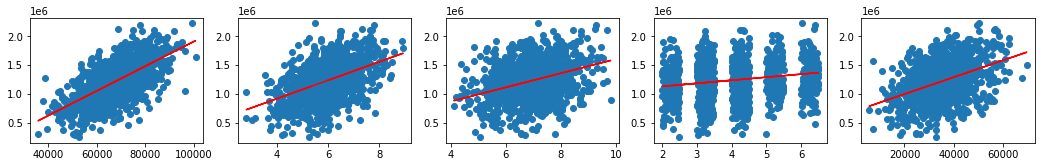

In [3]:
plt.figure(figsize=(18, 2.3))
for i in range(5):
    reg = linear_model.LinearRegression()
    reg.fit(x_train[:, i].reshape([-1, 1]), y_train)
    y_pred = reg.predict(x_test[:, i].reshape([-1, 1]))
    ax = plt.subplot(151 + i)
    ax.yaxis.get_major_formatter().set_powerlimits((0,1))
    plt.scatter(x_test[:, i], y_test)
    plt.plot(x_test[:, i], y_pred, color='r')
plt.show()

In [4]:
from sklearn import preprocessing
x_total_scaled = preprocessing.scale(x_total)
x_train_scaled = x_total_scaled[:4000]
x_test_scaled = x_total_scaled[4000:]

### Sklearn

In [5]:
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)
print(linreg.coef_)
print(linreg.intercept_)
y_pred_test = linreg.predict(x_test)

rmse_loss = np.sqrt(np.square(y_test - y_pred_test).mean())
print('rmse_loss:', rmse_loss)

[2.16552703e+01 1.65182806e+05 1.21190394e+05 1.01053408e+03
 1.51223654e+01]
-2637246.108215855
rmse_loss: 102055.70639140163


### Normal Equation

In [9]:
lambda_para = 0
X_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])
NE_solution = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train) + lambda_para * np.eye(X_train.shape[1])), np.transpose(X_train)), y_train.reshape([-1, 1]))
print(NE_solution)

X_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))])
y_pred_test = np.dot(X_test, NE_solution).flatten()

rmse_loss = np.sqrt(np.square(y_test - y_pred_test).mean())
print('rmse_loss:', rmse_loss)

[[ 2.16552703e+01]
 [ 1.65182806e+05]
 [ 1.21190394e+05]
 [ 1.01053408e+03]
 [ 1.51223654e+01]
 [-2.63724611e+06]]
rmse_loss: 102055.70639139735


### Feature Selection Example

In [15]:
delete_dim = 3
x_train_fs = np.delete(x_train, delete_dim, axis=1)
x_test_fs = np.delete(x_test, delete_dim, axis=1)

linreg = linear_model.LinearRegression()
linreg.fit(x_train_fs, y_train)
print(linreg.coef_)
print(linreg.intercept_)
y_pred_test = linreg.predict(x_test_fs)

rmse_loss = np.sqrt((np.square(y_test - y_pred_test)).mean())
print('rmse_loss:', rmse_loss)

[2.16587920e+01 1.65210871e+05 1.21764107e+05 1.51195533e+01]
-2637546.620254245
rmse_loss: 102099.3134864505


### TensorFlow

current num_step: 0
rmse 1267565.8
current num_step: 20
rmse 843285.1
current num_step: 40
rmse 562551.9
current num_step: 60
rmse 385613.03
current num_step: 80
rmse 265441.3
current num_step: 100
rmse 191017.39
current num_step: 120
rmse 146729.44
current num_step: 140
rmse 122478.04
current num_step: 160
rmse 110730.79
current num_step: 180
rmse 105826.66
current num_step: 200
rmse 103228.91
current num_step: 220
rmse 102357.25
current num_step: 240
rmse 102127.484
current num_step: 260
rmse 101917.49
current num_step: 280
rmse 101781.39
current num_step: 300
rmse 101862.234
current num_step: 320
rmse 101881.95
current num_step: 340
rmse 101908.12
current num_step: 360
rmse 102149.41
current num_step: 380
rmse 102097.414
current num_step: 400
rmse 102002.266
current num_step: 420
rmse 102079.586
current num_step: 440
rmse 102211.38
current num_step: 460
rmse 102109.58
current num_step: 480
rmse 102093.8


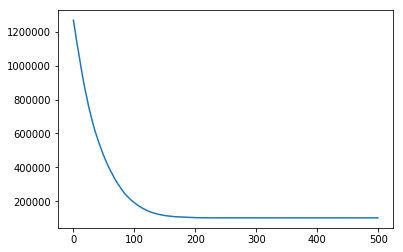

In [10]:
def shuffle_aligned_list(data):
    num = data[0].shape[0]
    shuffle_index = np.random.permutation(num)
    return [d[shuffle_index] for d in data]

def batch_generator(data, batch_size, shuffle=True):
    batch_count = 0
    while True:
        if batch_count * batch_size + batch_size >= data[0].shape[0]:
            batch_count = 0
            if shuffle:
                data = shuffle_aligned_list(data)
        start = batch_count * batch_size
        end = start + batch_size
        batch_count += 1
        yield [d[start:end] for d in data]

import tensorflow as tf

learning_rate = 0.01
batch_size = 40
num_steps = 500
l2_param = 0

x_tf = tf.placeholder(tf.float32)
y_tf = tf.placeholder(tf.float32)

w = tf.Variable(tf.zeros([5, 1]))
b = tf.Variable(tf.constant(0.0, shape=[1]))
y_pred = tf.matmul(x_tf, w) + b
loss = tf.reduce_mean(tf.square(y_tf - tf.squeeze(y_pred))) + l2_param * tf.nn.l2_loss(w)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# # mini-batch gradient descent
np.random.seed(0)
batch_g = batch_generator([x_train_scaled, y_train], batch_size, shuffle=True)
loss_list = []
for i in range(num_steps):
    test_loss = sess.run(loss, feed_dict={x_tf: x_test_scaled, y_tf: y_test})
    loss_list.append(np.sqrt(test_loss))
    if i % 20 == 0:
        print('current num_step:', i)
        print('rmse', np.sqrt(test_loss))
    
    x_batch, y_batch = batch_g.__next__()
    sess.run(train_op, feed_dict={x_tf: x_batch, y_tf: y_batch})
    
loss_array = np.array(loss_list)
plt.plot(np.arange(num_steps), loss_array)
plt.show()

# batch gradient descent
# loss_list = []
# for i in range(num_steps):
#     sess.run(train_op, feed_dict={x_tf: x_train_scaled, y_tf: y_train})
#     if i % 20 == 0:
#         test_loss = sess.run(loss, feed_dict={x_tf: x_test_scaled, y_tf: y_test})
#         loss_list.append(np.sqrt(test_loss))
#         print('current num_step:', i)
#         print('rmse', np.sqrt(test_loss))
# loss_array = np.array(loss_list)
# plt.plot(np.arange(num_steps), loss_array)
# plt.show()

### Handwritten Gradient Descent

current num_step: 0
rmse 1267565.8484062643
current num_step: 20
rmse 843285.1329858246
current num_step: 40
rmse 562552.014043575
current num_step: 60
rmse 385613.0871248521
current num_step: 80
rmse 265441.28468202514
current num_step: 100
rmse 191017.47214216896
current num_step: 120
rmse 146729.41964475493
current num_step: 140
rmse 122478.0362639746
current num_step: 160
rmse 110730.76453391477
current num_step: 180
rmse 105826.58337661889
current num_step: 200
rmse 103228.8880775472
current num_step: 220
rmse 102357.23892243345
current num_step: 240
rmse 102127.49141895583
current num_step: 260
rmse 101917.49638671849
current num_step: 280
rmse 101781.39153659127
current num_step: 300
rmse 101862.23502679035
current num_step: 320
rmse 101881.94658099177
current num_step: 340
rmse 101908.1132203555
current num_step: 360
rmse 102149.4054925808
current num_step: 380
rmse 102097.40934402094
current num_step: 400
rmse 102002.26666624864
current num_step: 420
rmse 102079.58064611268
cu

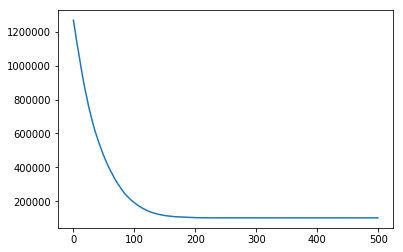

In [11]:
num_steps = 500
learning_rate = 0.01
batch_size = 40

weight = np.zeros(6)
np.random.seed(0)
batch_g = batch_generator([x_train_scaled, y_train], batch_size, shuffle=True)
x_test_scaled_concat = np.hstack([x_test_scaled, np.ones([x_test_scaled.shape[0], 1])])

loss_list = []
for i in range(num_steps):
    mse_loss = np.sqrt(np.square(np.dot(x_test_scaled_concat, weight) - y_test).mean())
    loss_list.append(mse_loss)
    if i % 20 == 0:
        print('current num_step:', i)
        print('rmse', mse_loss)
    
    x_batch, y_batch = batch_g.__next__()
    x_batch = np.hstack([x_batch, np.ones([batch_size, 1])])
    y_pred = np.dot(x_batch, weight)
    w_gradient = (x_batch * np.tile((y_pred - y_batch).reshape([-1, 1]), 6)).mean(axis=0)
    weight = weight - learning_rate * w_gradient * 2
loss_array = np.array(loss_list)
plt.plot(np.arange(num_steps), loss_array)
plt.show()